<a href="https://colab.research.google.com/github/skilove13/gan-coursera/blob/main/fid_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
from fid_score import *

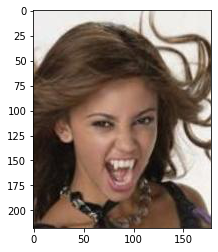

In [ ]:
img = np.array(Image.open('imgs/202494.jpg'))

plt.imshow(img)

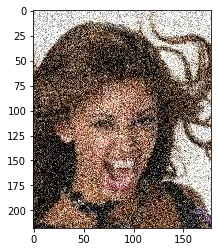

In [ ]:
img2 = iaa.AdditiveGaussianNoise(scale=0.2*255)(image=img)

plt.imshow(img2)

### dims
- 64: first max pooling features
- 192: second max pooling featurs
- 768: pre-aux classifier features
- 2048: final average pooling features (this is the default)

In [ ]:
calculate_fid_given_paths(
    paths=[
        img,
        img2
    ],
    batch_size=1,
    cuda=False,
    dims=2048
)

360.8515964718074

# Addictive Gaussian Noise

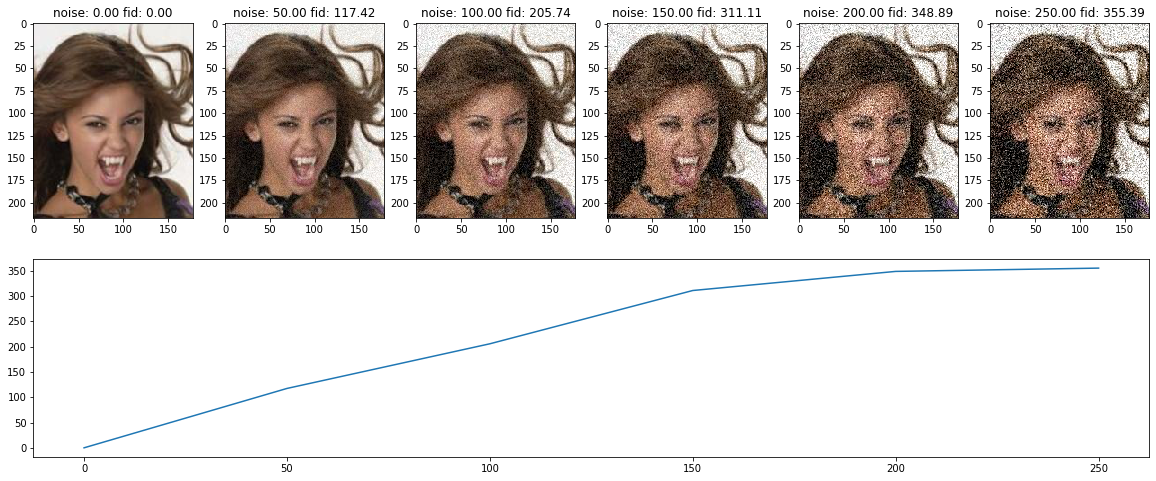

In [ ]:
fig = plt.figure(figsize=(20, 8))

xs, fids = [], []

for i, noise in enumerate(range(0, 256, 50)):
    img2 = iaa.AdditiveGaussianNoise(scale=0.2*noise)(image=img)
    
    fid = calculate_fid_given_paths(
        paths=[
            img,
            img2
        ],
        batch_size=1,
        cuda=False,
        dims=2048
    )
    
    xs.append(noise)
    fids.append(fid)
    
    plt.subplot(2, 6, i+1)
    plt.title('noise: %.2f fid: %.2f' % (noise, fid))
    plt.imshow(img2)

gs = fig.add_gridspec(2, 1)
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(xs, fids)

# Gaussian Blur

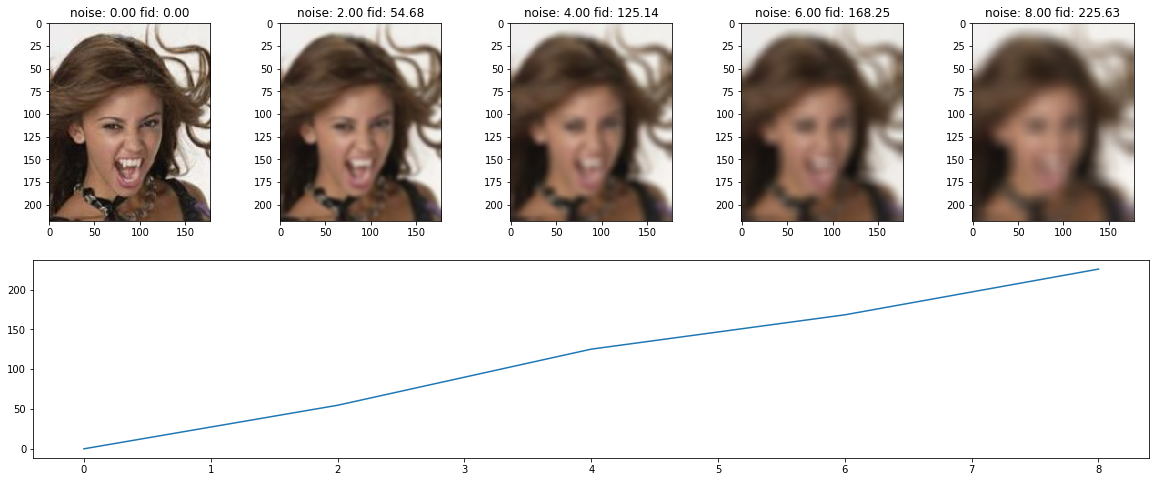

In [ ]:
fig = plt.figure(figsize=(20, 8))

xs, fids = [], []

for i, noise in enumerate(range(0, 10, 2)):
    img2 = iaa.GaussianBlur(sigma=noise)(image=img)
    
    fid = calculate_fid_given_paths(
        paths=[
            img,
            img2
        ],
        batch_size=1,
        cuda=False,
        dims=2048
    )
    
    xs.append(noise)
    fids.append(fid)
    
    plt.subplot(2, 5, i+1)
    plt.title('noise: %.2f fid: %.2f' % (noise, fid))
    plt.imshow(img2)

gs = fig.add_gridspec(2, 1)
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(xs, fids)

# Salt and Pepper

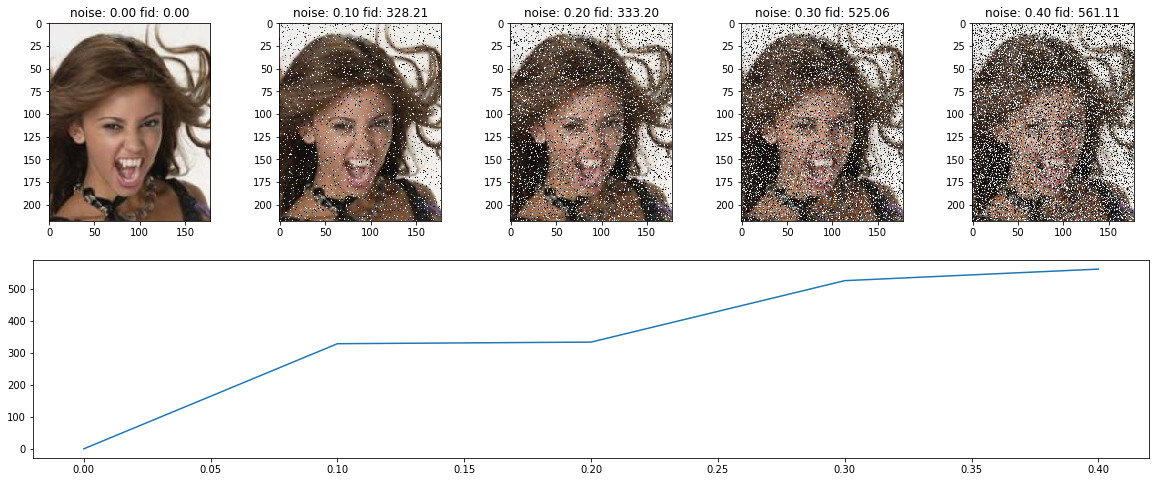

In [ ]:
fig = plt.figure(figsize=(20, 8))

xs, fids = [], []

for i, noise in enumerate(range(0, 5, 1)):
    noise /= 10
    img2 = iaa.SaltAndPepper(noise)(image=img)
    
    fid = calculate_fid_given_paths(
        paths=[
            img,
            img2
        ],
        batch_size=1,
        cuda=False,
        dims=2048
    )
    
    xs.append(noise)
    fids.append(fid)
    
    plt.subplot(2, 5, i+1)
    plt.title('noise: %.2f fid: %.2f' % (noise, fid))
    plt.imshow(img2)

gs = fig.add_gridspec(2, 1)
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(xs, fids)

# Add To Hue And Saturation

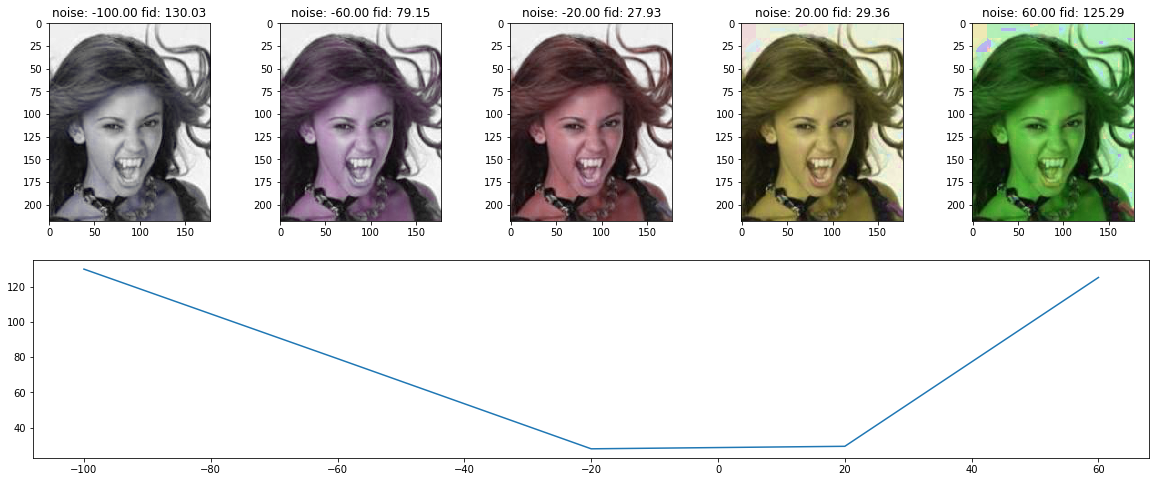

In [ ]:
fig = plt.figure(figsize=(20, 8))

xs, fids = [], []

for i, noise in enumerate(range(-100, 100, 40)):
    img2 = iaa.AddToHueAndSaturation(noise, per_channel=True)(image=img)
    
    fid = calculate_fid_given_paths(
        paths=[
            img,
            img2
        ],
        batch_size=1,
        cuda=False,
        dims=2048
    )
    
    xs.append(noise)
    fids.append(fid)
    
    plt.subplot(2, 5, i+1)
    plt.title('noise: %.2f fid: %.2f' % (noise, fid))
    plt.imshow(img2)

gs = fig.add_gridspec(2, 1)
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(xs, fids)